In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.ndimage as ndimage
import scipy.ndimage as nd
import scipy.interpolate as interpolate
import seaborn as sns
from matplotlib import rcParams
import math
import pandas as pd
from scipy import stats
%matplotlib inline

In [6]:
rcParams['font.sans-serif'] = ['Arial'] 
rcParams['font.size'] = 6 #7
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['axes.linewidth'] = 0.5
rcParams['lines.linewidth'] = 0.5
rcParams['lines.markersize'] = 2.5
rcParams['lines.markeredgewidth'] = 0.0

rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

to_inch = 0.393701
fwidth_cm = 10 
fheight_cm = 10. # cm

spwidth_cm = 1.5
spheight_cm = 3.


w = spwidth_cm/fwidth_cm
h = spheight_cm/fheight_cm

fwidth_inch = fwidth_cm * to_inch
fheight_inch = fheight_cm * to_inch

cmap = plt.cm.magma

lw_scatter = 0.4
ticks_fontsize = 6. 
spines_thickness = 0.5
ticks_width = spines_thickness
s_scatter = 8  # 10
lw_hlines = 1.0
lw_stats_bar = 0.6
lw_scatter = 0.2
alpha_scatter = 0.6
width_bars = 1.5
tick_length = 3.
markersize_rasterdots = 1.5 
fs = 6.
lw = 0.3 
ms = 1.5 

color_mpw = np.array([242,101,34])/255
color_su = [0.3,0.3,0.3] 
color_EXC = 'dimgray' 
color_INH = np.array([62,185,236.])/255 
    
despine_offset = 2

In [2]:
data_dir = '/.../Data/' 

In [3]:
Efficacies_1st2nd_PSR = np.load(data_dir + 'Efficacies_1st2nd_PSR.npy'  , encoding='latin1', allow_pickle=True).item()

efficacy_1st = Efficacies_1st2nd_PSR['efficacy_1st'] 
efficacy_2nd= Efficacies_1st2nd_PSR['efficacy_2nd'] 
exc_idx = Efficacies_1st2nd_PSR['mask_EXC'] 
inh_idx = Efficacies_1st2nd_PSR['mask_INH']
psr_deadTime30_MinMAxISI_2_30 = Efficacies_1st2nd_PSR['psr_deadTime30_MinMAxISI_2_30'] 
psr_deadTime30_MinMAxISI_5_30 = Efficacies_1st2nd_PSR['psr_deadTime30_MinMAxISI_5_30']
psr = psr_deadTime30_MinMAxISI_5_30.copy() 

efficacies_1st_EXC = efficacy_1st[exc_idx] 
efficacies_2nd_EXC = efficacy_2nd[exc_idx]
efficacies_1st_INH = efficacy_1st[inh_idx]
efficacies_2nd_INH = efficacy_2nd[inh_idx] 
   
psr_EXC = psr[exc_idx]
psr_INH = psr[inh_idx]

## Plot panel 4 C 

Efficacy Paired-Spike EXC p: 3.1255762381097145e-25
Efficacy Paired-Spike INH p: 1.6755923812758194e-06


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100')]

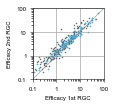

In [7]:
# 4C) Grid
stats_pairedSpike_EXC, p_pairedSpike_EXC = stats.wilcoxon(efficacies_1st_EXC, efficacies_2nd_EXC)
print('Efficacy Paired-Spike EXC p: %s'%p_pairedSpike_EXC)
stats_pairedSpike_INH , p_pairedSpike_INH = stats.wilcoxon(efficacies_1st_INH, efficacies_2nd_INH)
print('Efficacy Paired-Spike INH p: %s'%p_pairedSpike_INH)

fig = plt.figure()
plt.clf()
fig.set_size_inches(fwidth_inch,fheight_inch)

ax_4C = plt.axes([0.1,0.1,0.25,0.25])   
ax_4C.tick_params(length=tick_length)
ax_4C.tick_params(labelsize=ticks_fontsize)  # ticks size font
ax_4C.plot(np.array(efficacies_1st_EXC), np.array(efficacies_2nd_EXC), 'o', color=color_EXC, markersize=ms)
ax_4C.plot(np.array(efficacies_1st_INH), np.array(efficacies_2nd_INH), 'D', color=color_INH, markersize=ms)
ax_4C.plot([0.1,100], [0.1,100], 'gray')
ax_4C.grid()
ax_4C.set_xlabel('Efficacy 1st RGC')
ax_4C.set_ylabel('Efficacy 2nd RGC')
ax_4C.set_ylim([0.1,100]) 
ax_4C.set_xlim([0.1,100]) 
ax_4C.set_yscale('log')
ax_4C.set_xscale('log')
positions = [0.1,1, 10, 100]
labels = ['0.1', '1', '10', '100']
ax_4C.set_xticks(positions )  
ax_4C.set_xticklabels(labels)
ax_4C.set_yticks(positions )  
ax_4C.set_yticklabels(labels)

## Plot panel 4 D

Text(0.05, 0.7, 'p E vs I 2.5817931234597684e-05')

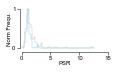

In [8]:
# 4 D)  Histrogram PSR
ax_4D = plt.axes([0.1,0.5, 0.2, 0.15])
ax_4D.tick_params(length=tick_length)
ax_4D.tick_params(labelsize=ticks_fontsize)  
ax_4D.tick_params(width=ticks_width) 
ax_4D.spines['left'].set_linewidth(spines_thickness)  
ax_4D.spines['bottom'].set_linewidth(spines_thickness)  
ax_4D.spines['right'].set_visible(False)
ax_4D.spines['top'].set_visible(False)

hs_range = np.arange(0, 13, 0.25)
hs_PPR_EXC = np.histogram(psr_EXC,hs_range)
hs_PPR_INH = np.histogram(psr_INH,hs_range)
hs_PPR_EXC = hs_PPR_EXC[0] / hs_PPR_EXC[0].max()
hs_PPR_INH = hs_PPR_INH[0] / hs_PPR_INH[0].max()
x_lim =  [0, 15] #  [0, 500]  #[0,500]
x_ticks = np.arange(x_lim[0], x_lim[1]+1, 5)
ax_4D.step(hs_range[0:-1],hs_PPR_INH, where='mid', linewidth=lw, alpha=0.9, color=color_INH)
ax_4D.step(hs_range[0:-1],hs_PPR_EXC, where='mid', linewidth=lw,  alpha=0.6, color=color_EXC)
plt.yticks([0,1])
plt.xlabel('PSR',labelpad=0)
plt.ylabel('Norm Frequ.',labelpad=0)
plt.tick_params('both',pad=1)
plt.xticks(x_ticks)

sns.despine(ax= ax_4D, offset=despine_offset , trim=True)
plt.xlim(x_lim)
stats_EI , p_value_PSR_EI = stats.ranksums(psr_EXC, psr_INH)
fig.text(0.05, 0.7, 'p E vs I %s'%(p_value_PSR_EI))

## Plot panel 4 E

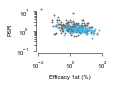

In [9]:
# 4E ) PSR vs Efficacy 1st
pearson_r_EXC, p_1stvsPPR_EXC = stats.pearsonr(np.log(efficacies_1st_EXC), np.log(list(psr_EXC)))
pearson_r_INH, p_1stvsPPR_INH = stats.pearsonr(np.log(efficacies_1st_INH), np.log(list(psr_INH)))
   
s_scatter = 3
fs = 6.
lim_eff = [0.01,100]
lim_ppr = [0.1,15]
   
ax_4E = plt.axes([0.7,0.15, 0.15,0.15])
ax_4E.tick_params(length=tick_length)
ax_4E.tick_params(labelsize=ticks_fontsize) 
ax_4E.spines['right'].set_visible(False)
ax_4E.spines['top'].set_visible(False)
ax_4E.scatter(np.array(efficacies_1st_EXC),  psr_EXC , s=s_scatter, marker='.', color=color_EXC ) #s=10, facecolors='none', edgecolors=color_EXC, linewidths=lw_scatter)
ax_4E.scatter(np.array(efficacies_1st_INH), psr_INH, s=s_scatter, marker='.', color=color_INH ) # s=10, facecolors='none', edgecolors=color_INH, linewidths=lw_scatter)
ax_4E.set_xlabel('Efficacy 1st (%)', fontsize=fs)
ax_4E.set_ylabel('PSR', fontsize=fs)
ax_4E.set_xscale('log')
ax_4E.set_yscale('log')
plt.xlim(lim_eff)
plt.ylim(lim_ppr)
sns.despine(ax= ax_4E, offset=2. , trim=True) 

## Plot panel 4 F

Text(0.4, 0.8, '5_30ms Mean EXC 1.7112781927303762 || INH 1.2807744023360161')

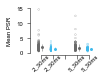

In [10]:
# 4 F) 
ISI_2_30_EXC = psr_deadTime30_MinMAxISI_2_30[exc_idx]
ISI_5_30_EXC = psr_deadTime30_MinMAxISI_5_30[exc_idx]
ISI_2_30_INH = psr_deadTime30_MinMAxISI_2_30[inh_idx]
ISI_5_30_INH = psr_deadTime30_MinMAxISI_5_30[inh_idx]

ee = np.ones(len(psr_EXC))*0.85
ii = np.ones(len(psr_INH))*1.85

ee_2 = np.ones(len(psr_EXC))*3.85
ii_2 = np.ones(len(psr_INH))*4.85

ax_4F = plt.axes([0.7, 0.5,  0.17, 0.16])
# EXC
ax_4F.scatter(ee, ISI_2_30_EXC, s=s_scatter, facecolors='none', edgecolors=color_EXC, linewidths=lw_scatter ) #'o', color = 'r')
ax_4F.plot(1.16, ISI_2_30_EXC.mean(), 'o', ms= 3,  color = color_EXC)
ax_4F.errorbar(1.16, ISI_2_30_EXC.mean(), ISI_2_30_EXC.std(), color=color_EXC) 
# INH
ax_4F.scatter(ii, ISI_2_30_INH, s=s_scatter, facecolors='none', edgecolors=color_INH, linewidths=lw_scatter) # 'o', color = 'r')
ax_4F.plot(2.16, ISI_2_30_INH.mean(), 'o', ms= 3, color = color_INH)
ax_4F.errorbar(2.16, ISI_2_30_INH.mean(), ISI_2_30_INH.std(), color=color_INH)
# ISI 2 
# EXC
ax_4F.scatter(ee_2, ISI_5_30_EXC, s=s_scatter, facecolors='none', edgecolors=color_EXC, linewidths=lw_scatter ) #'o', color = 'r')
ax_4F.plot(4.16, ISI_5_30_EXC.mean(), 'o', ms= 3,  color = color_EXC)
ax_4F.errorbar(4.16,ISI_5_30_EXC.mean(), ISI_5_30_EXC.std(), color=color_EXC) 
# INH
ax_4F.scatter(ii_2, ISI_5_30_INH, s=s_scatter, facecolors='none', edgecolors=color_INH, linewidths=lw_scatter) # 'o', color = 'r')
ax_4F.plot(5.16, ISI_5_30_INH.mean(), 'o', ms= 3, color = color_INH)
ax_4F.errorbar(5.16, ISI_5_30_INH.mean(), ISI_5_30_INH.std(), color=color_INH)

ax_4F.set_xticks([1,2,3,4,5])
ax_4F.set_yticks([0, 5, 10, 15])

ax_4F.set_xlim([0.3, 6.3])
ax_4F.set_ylabel('Mean PSR')

sns.despine(ax=ax_4F, offset=despine_offset, trim=True)
ax_4F.set_xticklabels( ['2_30ms', '2_30ms', '' ,  '5_30ms', '5_30ms'] , rotation= 45, va="center") #('ISI group')   

fig.text(0.4, 0.88, '2_30ms STD EXC %s || INH %s'%(ISI_2_30_EXC.std(), ISI_2_30_INH.std())) 
fig.text(0.4, 0.86, '2_30ms Mean EXC %s || INH %s'%(ISI_2_30_EXC.mean(), ISI_2_30_INH.mean())) 
fig.text(0.4, 0.82, '5_30ms STD EXC %s || INH %s'%(ISI_5_30_EXC.std(), ISI_5_30_INH.std())) 
fig.text(0.4, 0.8, '5_30ms Mean EXC %s || INH %s'%(ISI_5_30_EXC.mean(), ISI_5_30_INH.mean())) 

In [11]:
df_Figure4 = pd.DataFrame()
df_Figure4['efficacy_1st'] =  efficacy_1st
df_Figure4['efficacy_2nd'] =  efficacy_2nd
df_Figure4['EXC'] = exc_idx
df_Figure4['INH'] = inh_idx

df_Figure4['psr_deadTime30_MinMAxISI_2_30']  = psr_deadTime30_MinMAxISI_2_30 
df_Figure4['psr_deadTime30_MinMAxISI_5_30'] = psr_deadTime30_MinMAxISI_5_30

In [12]:
#  write data as .xlsx
sheet_name = 'fig4'
file_name = data_dir + 'data_source_fig4.xlsx'
writer = pd.ExcelWriter(file_name) 

with pd.ExcelWriter(file_name) as writer:
    df_Figure4.to_excel(writer, sheet_name=sheet_name,startcol=0)

writer.close()

/Users/carolingehr/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
